In [13]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
from pandas import Series as s
from pandas import DataFrame as f
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
pwd

'C:\\Users\\HP'

In [ ]:
#Dataset1 from kaggle 

In [55]:
data=pd.read_csv(r"C:\\Users\\HP\downloads\heart.csv")
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [ ]:
#removing target column

In [53]:
#x=data[['age', 'sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope','ca','thal']].values
#y=data['target'].values
#print(x)
#print(y)

In [5]:
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [8]:
p=knn.predict(x_test)
print("knn test set confusionmatrix:",confusion_matrix(y_test,p))
print("knn train set accuracy:",metrics.accuracy_score(y_train,knn.predict(x_train)))
print("knn test set accuracy:",metrics.accuracy_score(y_test,p))

knn test set confusionmatrix: [[25  8]
 [10 18]]
knn train set accuracy: 0.756198347107438
knn test set accuracy: 0.7049180327868853


In [ ]:
#randomforest

In [11]:
ran=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2).fit(x_train,y_train)
r=ran.predict(x_test)
print("Random forest Train set Accuracy: ", metrics.accuracy_score(y_train, ran.predict(x_train)))
print("random forest Test set Accuracy: ", metrics.accuracy_score(y_test, r))

Random forest Train set Accuracy:  1.0
random forest Test set Accuracy:  0.7868852459016393


In [ ]:
#decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(x_train,y_train)
t=tree.predict(x_test)
tacc=accuracy_score(y_test,t)
print('decision tree accuracy: ',tacc)
print('decision tree confusion matrix: ',confusion_matrix(y_test,t))


decision tree accuracy:  0.7377049180327869
decision tree confusion matrix:  [[28  5]
 [11 17]]


In [ ]:
#NAIVE BAYES ALGORITHM

In [110]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
ni=naive.predict(x_test)
nacc=accuracy_score(y_test,ni)
print('naive accuracy: ',nacc)
print('naive confusion matrix: ',confusion_matrix(y_test,ni))

print(ran.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]))

naive accuracy:  0.7213114754098361
naive confusion matrix:  [[22 11]
 [ 6 22]]
[1]


In [ ]:
#Dataset2
#here i've used another data set framingham_heart_disease from kaggle and analysed it

In [48]:
data1=pd.read_csv(r"C:\\Users\\HP\downloads\framingham_heart_disease.csv")
data1=data1.fillna(data1.mode().iloc[0])
print(data1)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
0          1   39        4.0              0         0.0     0.0   
1          0   46        2.0              0         0.0     0.0   
2          1   48        1.0              1        20.0     0.0   
3          0   61        3.0              1        30.0     0.0   
4          0   46        3.0              1        23.0     0.0   
...      ...  ...        ...            ...         ...     ...   
4233       1   50        1.0              1         1.0     0.0   
4234       1   51        3.0              1        43.0     0.0   
4235       0   48        2.0              1        20.0     0.0   
4236       0   44        1.0              1        15.0     0.0   
4237       0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0  

In [ ]:
#removing target column

In [49]:
X1=data1[['gender','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']].values
y1=data1['TenYearCHD'].values
print(X1)
print(y1)
print(X1.shape)
print(y1.shape)

[[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    48.     2.   ...  22.    84.    86.  ]
 [  0.    44.     1.   ...  19.16  86.    75.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
[0 0 0 ... 0 0 0]
(4238, 15)
(4238,)


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [113]:
p=knn.predict(x_test)
print("knn test set confusionmatrix:",confusion_matrix(y_test,p))
print("knn train set accuracy:",metrics.accuracy_score(y_train,knn.predict(x_train)))
print("knn test set accuracy:",metrics.accuracy_score(y_test,p))

knn test set confusionmatrix: [[23  7]
 [12 19]]
knn train set accuracy: 0.7644628099173554
knn test set accuracy: 0.6885245901639344


In [114]:
ran=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2).fit(x_train,y_train)
r=ran.predict(x_test)
print("Random forest Train set Accuracy: ", metrics.accuracy_score(y_train, ran.predict(x_train)))
print("random forest Test set Accuracy: ", metrics.accuracy_score(y_test, r))

Random forest Train set Accuracy:  1.0
random forest Test set Accuracy:  0.8688524590163934


In [115]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(x_train,y_train)
t=tree.predict(x_test)
tacc=accuracy_score(y_test,t)
print('decision tree accuracy: ',tacc)
print('decision tree confusion matrix: ',confusion_matrix(y_test,t))


decision tree accuracy:  0.819672131147541
decision tree confusion matrix:  [[22  8]
 [ 3 28]]


In [116]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)
ni=naive.predict(x_test)
nacc=accuracy_score(y_test,ni)
print('naive accuracy: ',nacc)
print('naive confusion matrix: ',confusion_matrix(y_test,ni))

print(ran.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]))

naive accuracy:  0.8524590163934426
naive confusion matrix:  [[24  6]
 [ 3 28]]
[1]


In [ ]:
#STNDARIZATION OF INPUT DATA

In [50]:
#scaler=StandardScaler()
#print("MinMax")
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

MinMax


In [ ]:
#-----------MODEL BUILDING-----------#

In [51]:
kfold=KFold(10,random_state=7)
models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))
models.append(("NB",GaussianNB()))
models.append(("LG",LogisticRegression()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
results=[]
names=[]
for name,model in models:
	v=cross_val_score(model,X1,y1,cv=kfold,scoring='accuracy')
	results.append(v)
	names.append(name)
	print(name)
	print("Accuracy values for different iterations are")
	print(v)
	print("The mean accuracy value is")
	print(v.mean())

KNN
Accuracy values for different iterations are
[0.81132075 0.82075472 0.84433962 0.87264151 0.85613208 0.83490566
 0.82311321 0.84198113 0.8392435  0.82269504]
The mean accuracy value is
0.8367127213524244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM
Accuracy values for different iterations are
[0.81603774 0.8490566  0.8490566  0.875      0.85141509 0.84433962
 0.84198113 0.85377358 0.86288416 0.83687943]
The mean accuracy value is
0.8480423970739105
NB
Accuracy values for different iterations are
[0.78537736 0.81603774 0.83490566 0.86792453 0.82311321 0.81367925
 0.81603774 0.83490566 0.84160757 0.80851064]
The mean accuracy value is
0.8242099335385162


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LG
Accuracy values for different iterations are
[0.81839623 0.85849057 0.85377358 0.88207547 0.85141509 0.84669811
 0.85613208 0.85377358 0.86997636 0.8392435 ]
The mean accuracy value is
0.852997457513716
CART
Accuracy values for different iterations are
[0.74764151 0.77830189 0.79009434 0.78066038 0.73584906 0.71698113
 0.73584906 0.74056604 0.74940898 0.72340426]
The mean accuracy value is
0.7498756634997101


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF
Accuracy values for different iterations are
[0.79716981 0.84669811 0.8254717  0.86320755 0.85141509 0.83962264
 0.84433962 0.86320755 0.84397163 0.8250591 ]
The mean accuracy value is
0.8400162808332217


In [ ]:
#heatmap just a graphical representation of values by diffeent color.

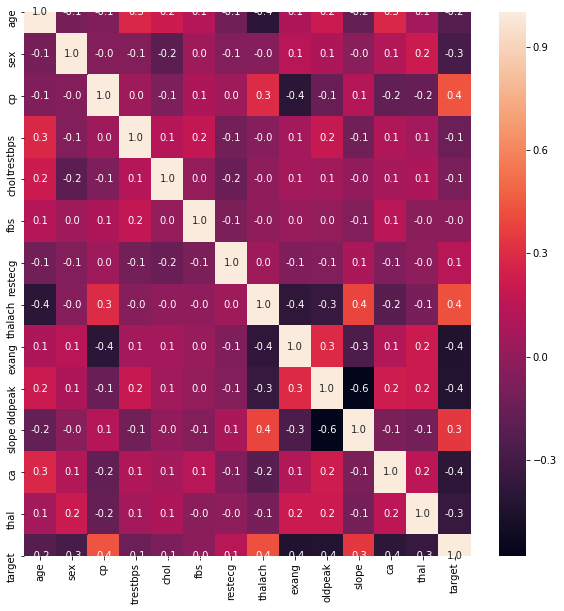

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()


In [ ]:
#pairplot

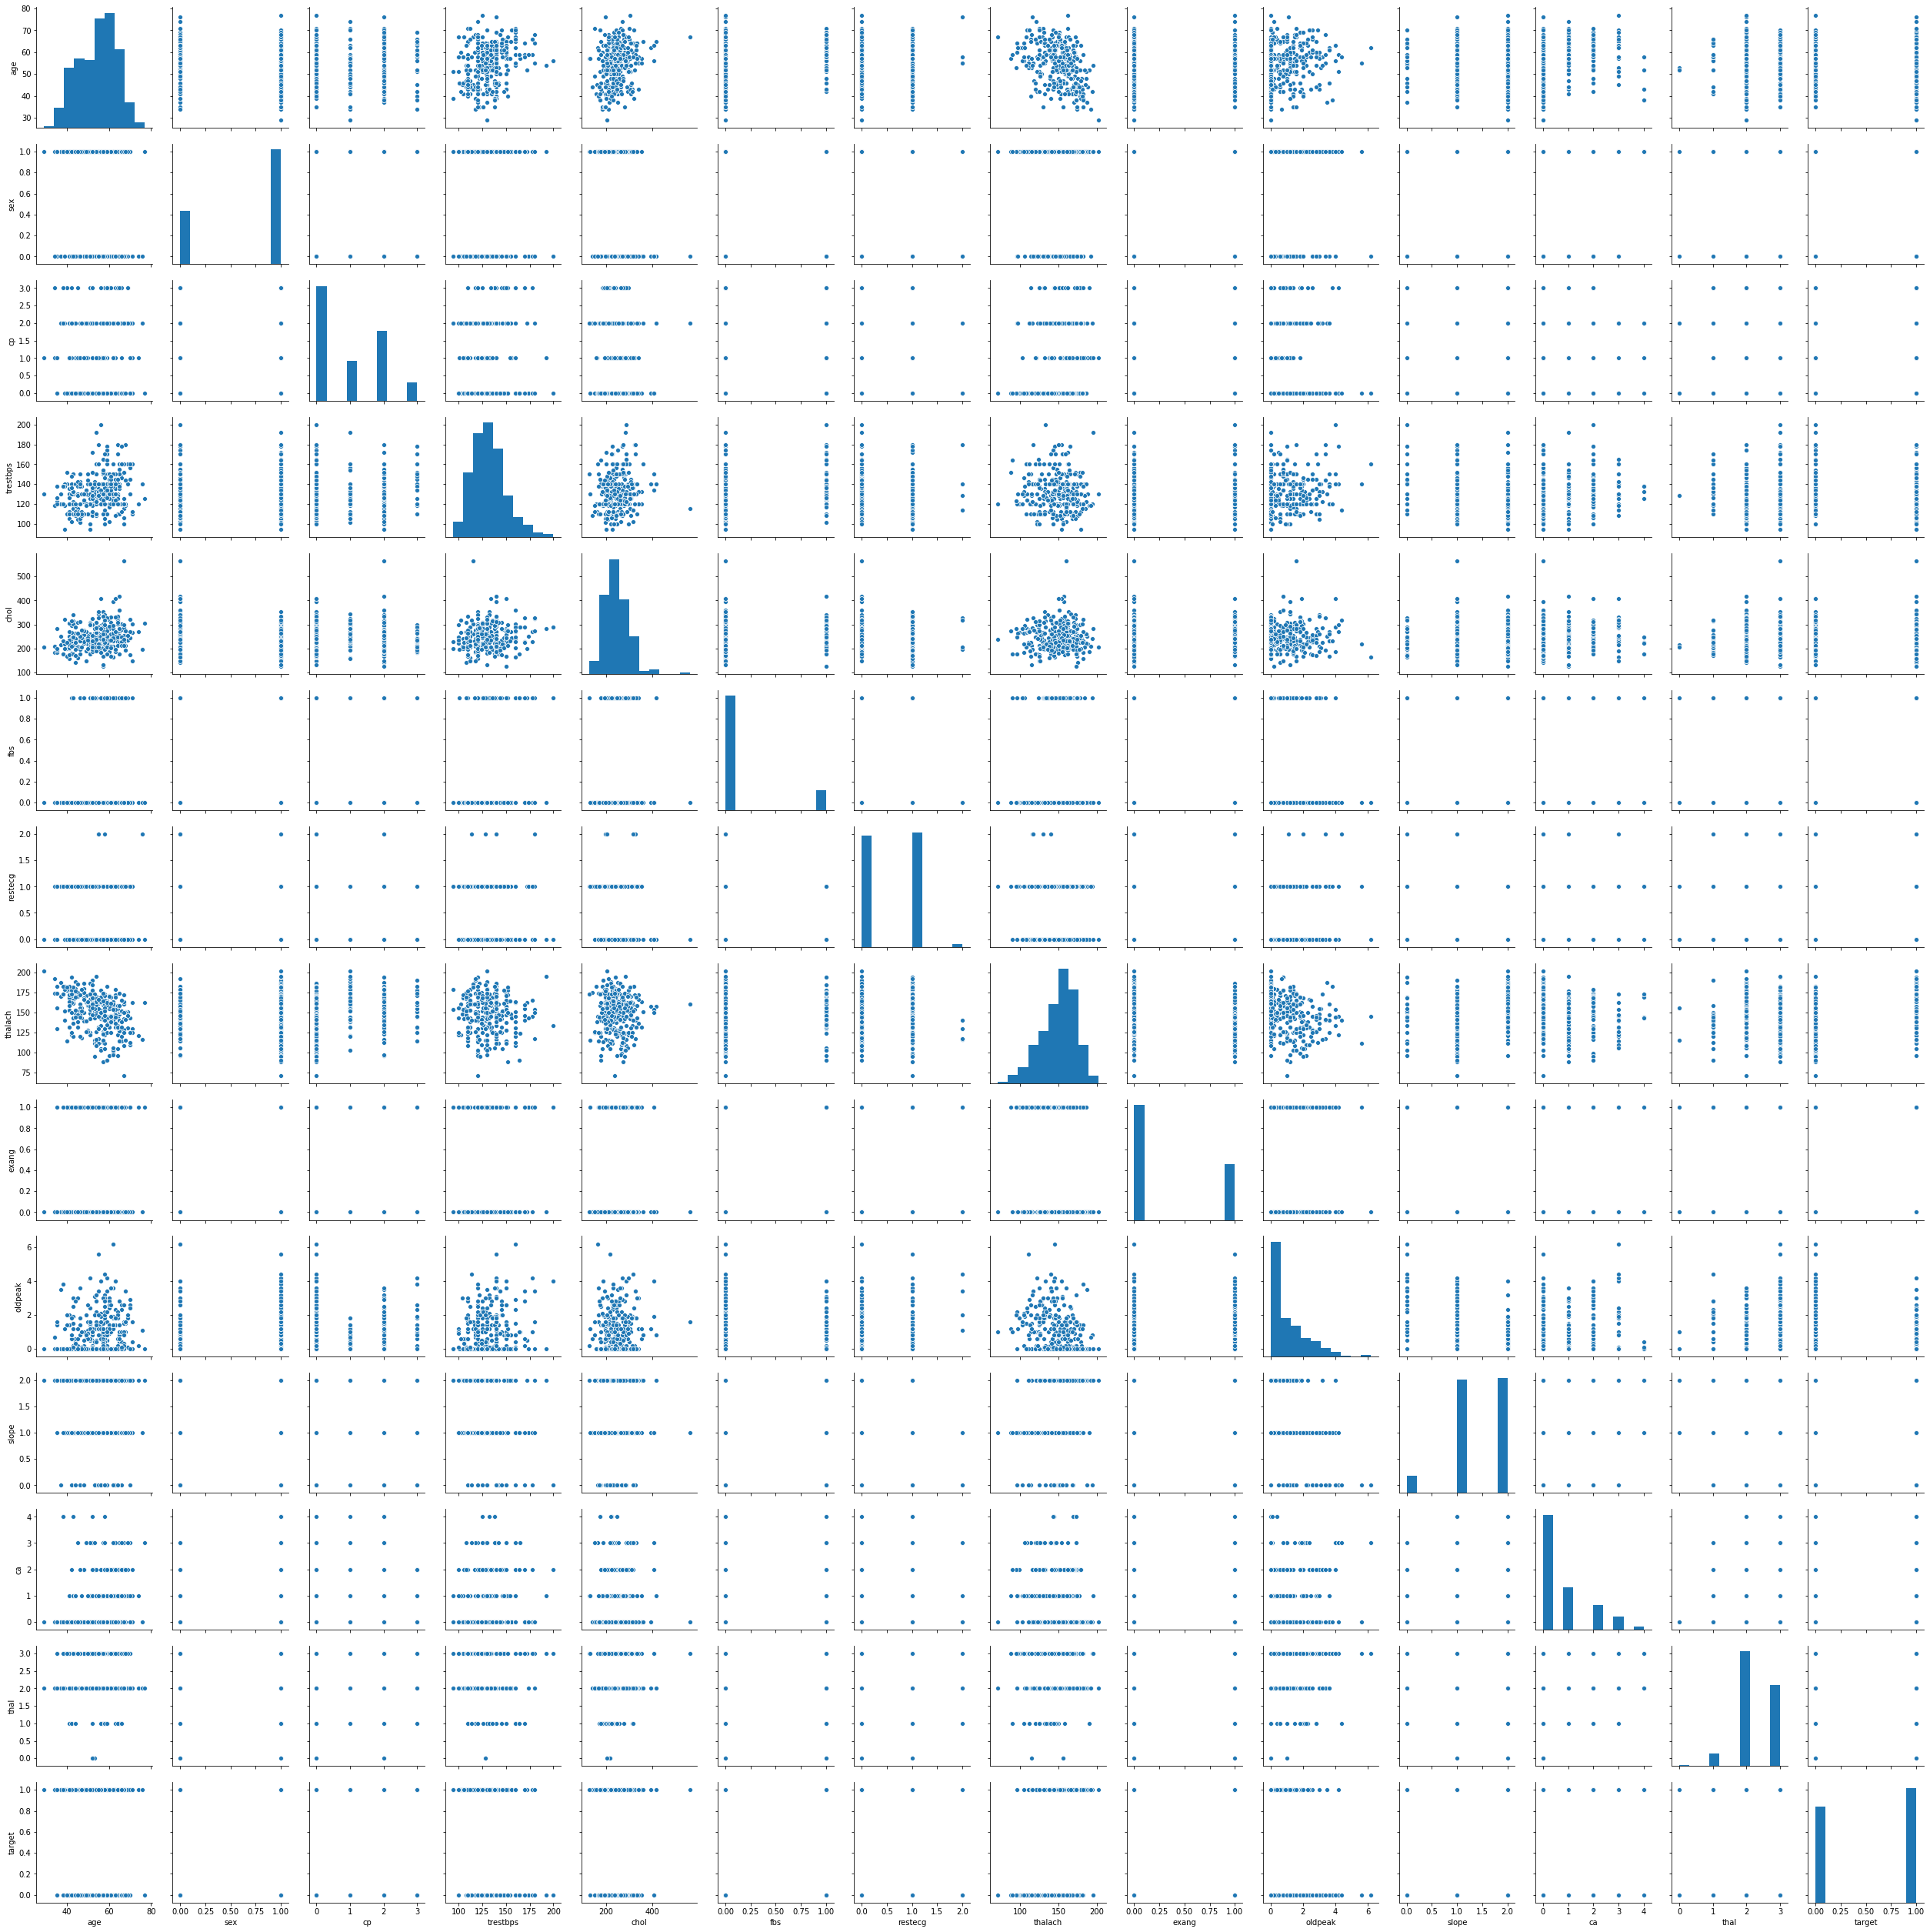

In [82]:
sns.pairplot(data)
plt.show()

In [ ]:
##data age show value counts for age least 10

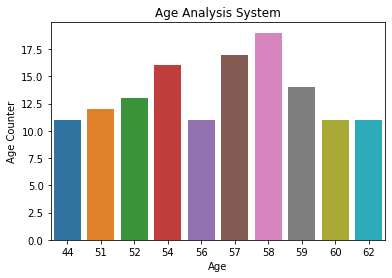

In [84]:
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [ ]:
#firstly find min and max ages

Min Age : 32
Max Age : 70
Mean Age : 49.58494572911751
Young Ages : 555
Middle Ages : 2366
Elderly Ages : 1172


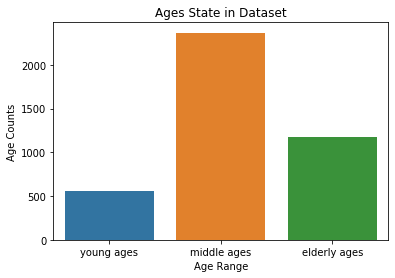

In [28]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()


In [ ]:
#Age Range Analysis

In [102]:
data['AgeRange']=0
youngAge_index=data[(data.age>=29)&(data.age<40)].index
middleAge_index=data[(data.age>=40)&(data.age<55)].index
elderlyAge_index=data[(data.age>55)].index
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2

for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0
 

In [ ]:
#1:male 0:female

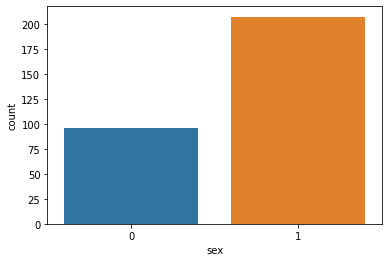

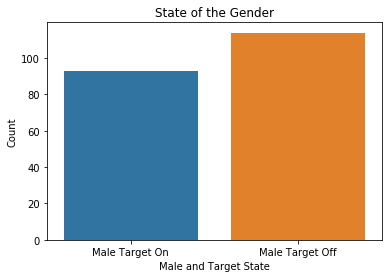

In [57]:
sns.countplot(data.sex)
plt.show()
#Male State & target 1 & 0
male_andtarget_on=len(data[(data.sex==1)&(data['target']==1)])
male_andtarget_off=len(data[(data.sex==1)&(data['target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()


In [93]:
#As seen, there are 4 types of chest pain.

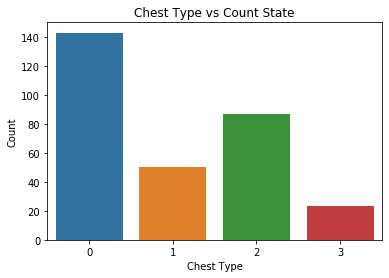

In [66]:

data.cp.value_counts()
sns.countplot(data.cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()


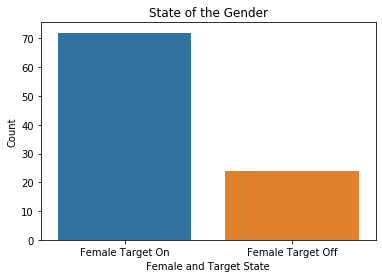

In [64]:
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

In [ ]:
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad
###condition of cp==0

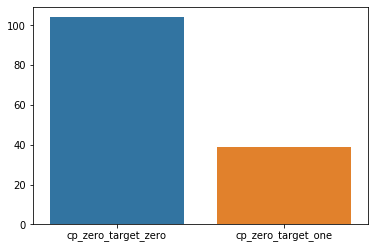

In [67]:
cp_zero_target_zero=len(data[(data.cp==0)&(data.target==0)])
cp_zero_target_one=len(data[(data.cp==0)&(data.target==1)])
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [ ]:
###condition of cp==1

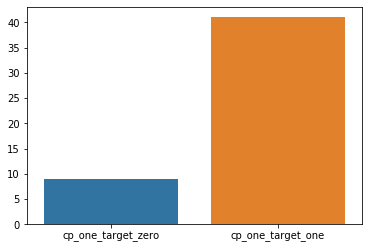

In [68]:
cp_one_target_zero=len(data[(data.cp==1)&(data.target==0)])
cp_one_target_one=len(data[(data.cp==1)&(data.target==1)])
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [ ]:
### condition of cp==2

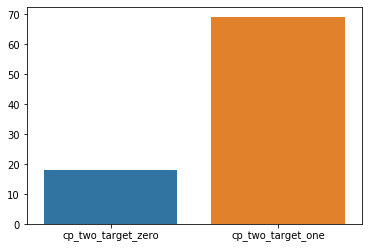

In [69]:
cp_two_target_zero=len(data[(data.cp==2)&(data.target==0)])
cp_two_target_one=len(data[(data.cp==2)&(data.target==1)])
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [ ]:
### condition of cp==3

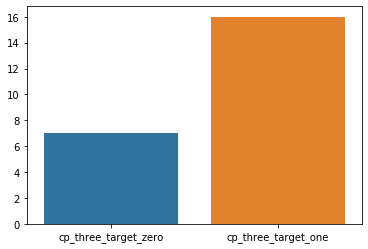

In [70]:
cp_three_target_zero=len(data[(data.cp==3)&(data.target==0)])
cp_three_target_one=len(data[(data.cp==3)&(data.target==1)])
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()


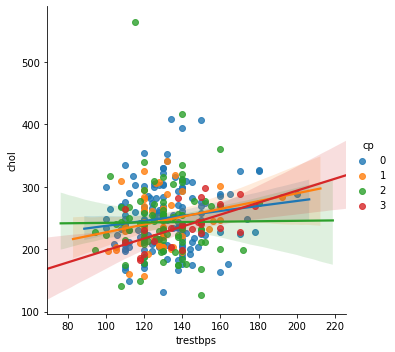

In [86]:
###
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()


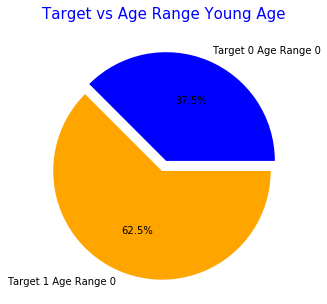

In [104]:
target_0_agerang_0=len(data[(data.target==0)&(data['AgeRange']==0)])
target_1_agerang_0=len(data[(data.target==1)&(data['AgeRange']==0)])
colors = ['blue','orange']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

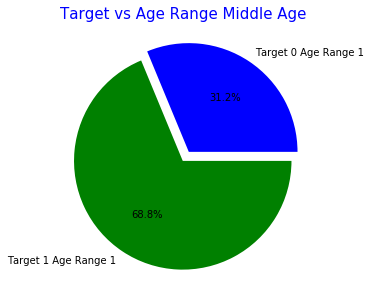

In [107]:
target_0_agerang_1=len(data[(data.target==0)&(data['AgeRange']==1)])
target_1_agerang_1=len(data[(data.target==1)&(data['AgeRange']==1)])
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()



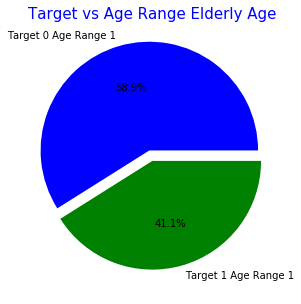

In [109]:
#### age middle

target_0_agerang_1=len(data[(data.target==0)&(data['AgeRange']==2)])
target_1_agerang_1=len(data[(data.target==1)&(data['AgeRange']==2)])
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age',color = 'blue',fontsize = 15)
plt.show()


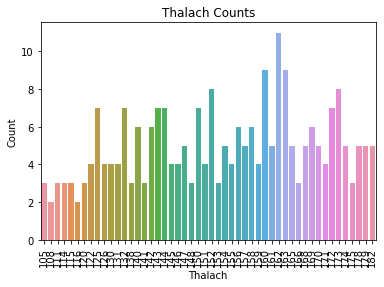

In [75]:
####maximum heart rate achieved((220-our age),maximum heart rate of the person).
#print(data.thalach.value_counts()[:].sum())
sns.barplot(x=data.thalach.value_counts()[:50].index,y=data.thalach.value_counts()[:50].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=90)
plt.show()

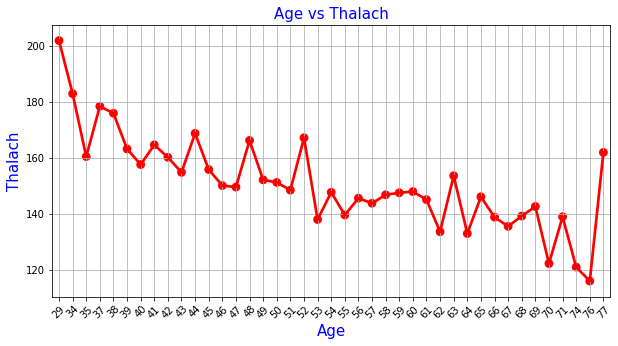

In [76]:
####age vs thalach
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
pge_thalach_values=data.groupby('age')['thalach'].count().values
plt.show()

In [ ]:
#From the above pie chart we came to know the fact that young people suffer major heart problem than the elderly aged.

In [ ]:
#Throughout the analysis we get to know that the best fit for the data1 
#i.e.; for predicting if the person have heart disease or not can be done by the Random forest algorithm.
#The second set of data is related to the risk of having the heart disease with in ten year, this type of prediction can be done by the Random forest model. 
